# 🧪 Exploratory Data Analysis (EDA)
Notebook ini digunakan untuk menuliskan proses EDA (analisis deskriptif dan visualisasi data).
- Gunakan `pandas` dan `matplotlib/seaborn`
- Tampilkan statistik deskriptif
- Visualisasi distribusi, korelasi, outlier, dll.

In [6]:
pip install pandas mlxtend openpyxl

  Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp313-cp313-win_amd64.whl.metadata (110 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using c

In [8]:
# Contoh import
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth


In [21]:
import pandas as pd

# Gunakan path relatif aman
df = pd.read_excel('../data/raw/Online Retail.xlsx')

print(df.head(10))


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26

In [22]:
# ===== EDA: STEP 2 - CEK MISSING VALUES & DUPLIKAT =====
print(df.isnull().sum())
print(df[df['CustomerID'].isnull() | df['Description'].isnull()].head())
print(f"Baris duplikat: {df.duplicated().sum()}")
print(df[df.duplicated()].head())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
     InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
622  2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445 2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446 2010-12-01 14:32:00       1.66         NaN  Unite

In [26]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [23]:
# ===== EDA: STEP 3 - STATISTIK DESKRIPTIF =====
print(f"Total data transaksi: {len(df)}")
print(f"Pelanggan unik: {df['CustomerID'].nunique()}")
print(f"Produk unik: {df['Description'].nunique()}")
print(df[['Quantity', 'UnitPrice']].describe())
print(df[['Quantity', 'UnitPrice']].median())


Total data transaksi: 541909
Pelanggan unik: 4372
Produk unik: 4223
            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000
Quantity     3.00
UnitPrice    2.08
dtype: float64


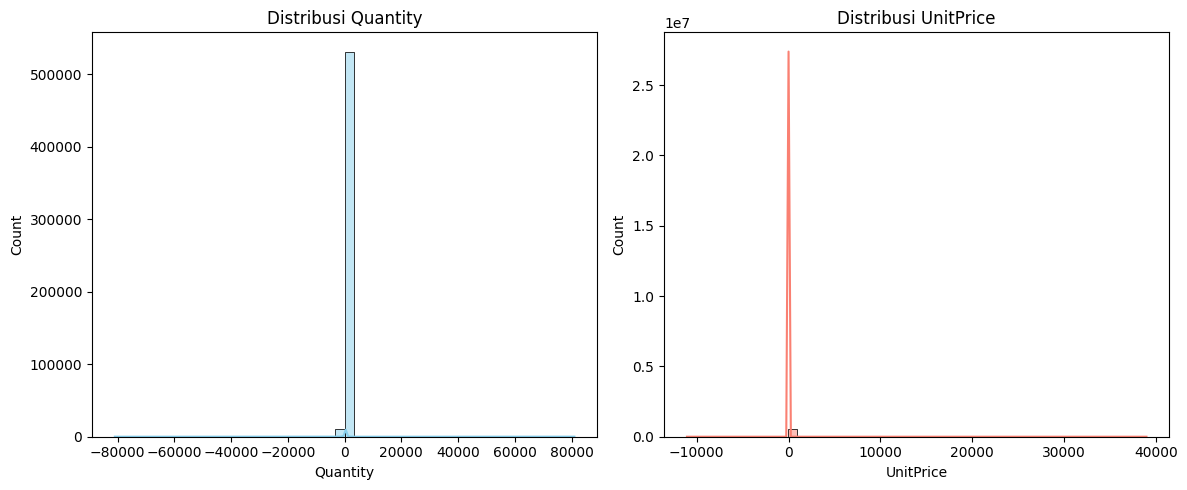

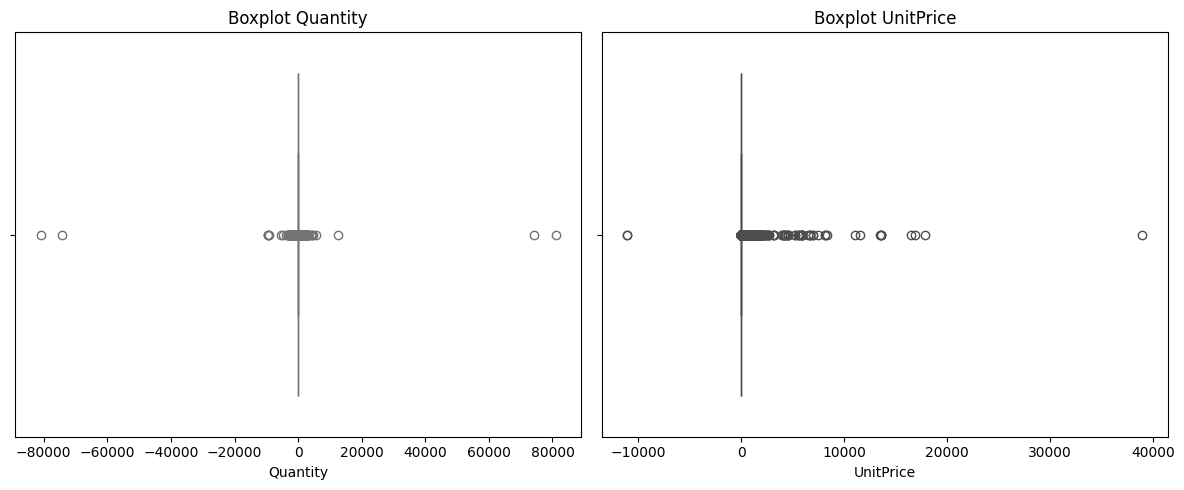

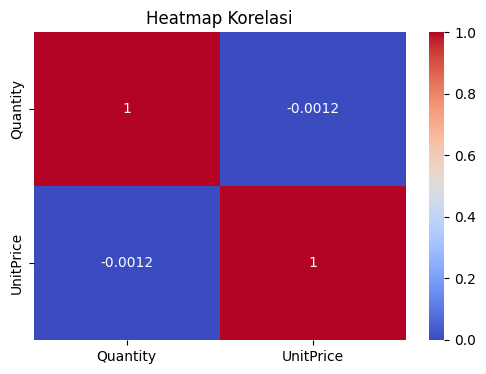

In [27]:
import seaborn as sns


# ===== EDA: STEP 3B - VISUALISASI =====
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Quantity')

plt.subplot(1, 2, 2)
sns.histplot(df['UnitPrice'], bins=50, kde=True, color='salmon')
plt.title('Distribusi UnitPrice')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Quantity'], color='lightgreen')
plt.title('Boxplot Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['UnitPrice'], color='orange')
plt.title('Boxplot UnitPrice')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(df[['Quantity', 'UnitPrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()